#### Housekeeping

In [1]:
%reset -f

import pandas as pd
import numpy as np
# import folium   
# import os
# import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 16})
from matplotlib.transforms import ScaledTranslation
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoLocator

import seaborn as sns

import nrarfcn as nr
# https://gitlab.com/alexander_marder/earfcn
# https://pypi.org/project/earfcn/0.0.3/
from earfcn.convert import earfcn2freq

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Avoid truncation based on the display width
pd.set_option('display.max_colwidth', None)  # Avoid truncation for column content

##### Bokeh plot function

In [2]:
# import geopandas as gpd
# from bokeh.plotting import figure, output_notebook, show
# output_notebook()
# from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, HoverTool, WheelZoomTool, WMTSTileSource
# from bokeh.palettes import Viridis256

# def plot_geo_scatter_map(df, value_col, title="Geo Map", colorbar_title="Value", unit=""):
#     # Create GeoDataFrame and project to Web Mercator
#     gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs="EPSG:4326").to_crs("EPSG:3857")
#     gdf['x'], gdf['y'] = gdf.geometry.x, gdf.geometry.y

#     # Setup Bokeh figure
#     p = figure(
#         title=title, width=800, height=500,
#         x_axis_type="mercator", y_axis_type="mercator",
#         tools="pan,reset,save",
#         x_range=(gdf['x'].min()-300, gdf['x'].max()+300),
#         y_range=(gdf['y'].min()-300, gdf['y'].max()+300)
#     )
#     p.add_tools(WheelZoomTool(zoom_on_axis=False))
#     p.add_tile(WMTSTileSource(
#         url='https://cartodb-basemaps-4.global.ssl.fastly.net/light_all/{Z}/{X}/{Y}.png',
#         attribution="© CartoDB contributors")
#     )

#     # Color mapping and data source
#     color_mapper = LinearColorMapper(palette=Viridis256, low=gdf[value_col].min(), high=gdf[value_col].max())
#     source = ColumnDataSource(gdf[['x', 'y', value_col, 'latitude', 'longitude']])

#     # Scatter points
#     p.scatter(
#         x='x', y='y', size=5, source=source,
#         fill_color={'field': value_col, 'transform': color_mapper},
#         line_color=None, fill_alpha=0.7
#     )

#     # Color bar and hover
#     p.add_layout(ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title=colorbar_title), 'right')
#     p.add_tools(HoverTool(tooltips=[
#         ("Lat/Lon", "@{latitude}, @{longitude}"),
#         (value_col, f"@{{{value_col}}} {unit}")
#     ]))

#     p.toolbar.active_drag = None
#     p.toolbar.active_inspect = None

#     show(p)

##### Read Data

In [3]:
df_wifi_scan = pd.read_csv('../_data/Spring2025_ArkansasNH/qp_wifi_scan_time.csv')
df_wifi_connect = pd.read_csv('../_data/Spring2025_ArkansasNH/qp_wifi_connect_time.csv')

# print(df_wifi_scan['Collection'].value_counts())
print(df_wifi_connect[['Collection', 'SSID']].value_counts())

df_wifi_scan['Collection_1'] = np.nan
df_wifi_scan['Collection_1'] = np.where(df_wifi_scan['Collection'].isin([
    'Day1-TMO-MNO-DEF-IN', 'Day2-ATT-MNO-4G-IN', 'Day1-TMO-NH-IN', 'Day2-VZN-MNO-DEF-IN', 'Day2-TMO-MNO-4G-IN',
    'Day2-ATT-MNO-DEF-IN', 'Day1-ATT-MNO-DEF-IN', 'Day1-WIFI-IN', 'Day2-VZN-MNO-4G-IN', 'Day1-ATT-NH-IN', 'Day2-TMO-MNO-DEF-IN' 
    ]), 'IN', df_wifi_scan['Collection_1'])
df_wifi_scan['Collection_1'] = np.where(df_wifi_scan['Collection'].isin([
    'Day1-ATT-NH-OUT', 'Day1-ATT-MNO-DEF-OUT', 'Day1-TMO-MNO-DEF-OUT', 'Day2-TMO-MNO-4G-OUT', 'Day2-ATT-MNO-DEF-OUT', 'Day2-ATT-MNO-4G-OUT',
    'Day2-TMO-MNO-DEF-OUT', 'Day1-TMO-NH-OUT', 'Day2-VZN-MNO-DEF-OUT', 'Day2-VZN-MNO-4G-OUT', 'Day1-WIFI-OUT'
    ]), 'OUT', df_wifi_scan['Collection_1'])
df_wifi_scan = df_wifi_scan[df_wifi_scan['Collection_1'].notna()]

Collection     SSID         
Day1-WIFI-IN   "Walmartwifi"    608
Day1-WIFI-OUT  "Walmartwifi"    470
Name: count, dtype: int64


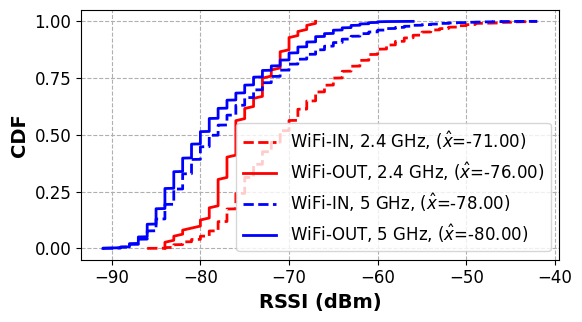

In [4]:
fig, ax = plt.subplots(figsize=(6, 3.5))
plt.rcParams['text.usetex'] = False 

df_temp = df_wifi_scan[
    (df_wifi_scan['SSID']=='Walmartwifi') & (df_wifi_scan['Technology Band']=='WiFi (2.4 GHz)') & (df_wifi_scan['Collection_1']=='IN')
]["RSSI"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"WiFi-IN, 2.4 GHz, ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='--', color="r")
del df_temp

df_temp = df_wifi_scan[
    (df_wifi_scan['SSID']=='Walmartwifi') & (df_wifi_scan['Technology Band']=='WiFi (2.4 GHz)') & (df_wifi_scan['Collection_1']=='OUT')
]["RSSI"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"WiFi-OUT, 2.4 GHz, ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='-', color="r")
del df_temp

df_temp = df_wifi_scan[
    (df_wifi_scan['SSID']=='Walmartwifi') & (df_wifi_scan['Technology Band']=='WiFi (5 GHz)') & (df_wifi_scan['Collection_1']=='IN')
]["RSSI"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"WiFi-IN, 5 GHz, ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='--', color="b")
del df_temp

df_temp = df_wifi_scan[
    (df_wifi_scan['SSID']=='Walmartwifi') & (df_wifi_scan['Technology Band']=='WiFi (5 GHz)') & (df_wifi_scan['Collection_1']=='OUT')
]["RSSI"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"WiFi-OUT, 5 GHz, ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='-', color="b")
del df_temp

ax.set_xlabel('RSSI (dBm)', fontsize=14, fontweight='bold')
ax.set_ylabel('CDF', fontsize=14, fontweight='bold')
ax.yaxis.set_minor_locator(AutoLocator())
ax.grid(True, linestyle='--', which='both', axis='both')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
plt.show()